In [1]:
import spacy

In [5]:
nlp = spacy.load('en')

In [3]:
import sqlite3
import pandas as pd
import datetime
from textblob import TextBlob

In [6]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

In [7]:
conn = sqlite3.connect('chat.db')
c = conn.cursor()

In [8]:
cmd2 = 'SELECT ROWID, text, handle_id, \
            datetime(date + strftime(\'%s\',\'2001-01-01\'), \'unixepoch\') as date_utc \
            FROM message T1 \
            INNER JOIN chat_message_join T2 \
                ON T1.ROWID=T2.message_id \
                AND T1.is_from_me=1\
            ORDER BY T2.chat_ID, T1.date'
c.execute(cmd2)
all_msg = pd.DataFrame(c.fetchall(), columns=['id','text','sender','time'])

In [18]:
all_msg.time = pd.to_datetime(all_msg.time)
#cutting to just 2017
twentyseventeen_msg = all_msg[all_msg.time.dt.year == 2017]
all_msg_clean = all_msg[all_msg.time.dt.year > 2015]

## iMessages over time

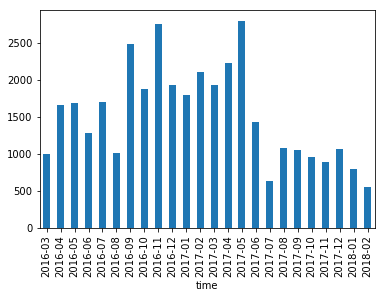

In [19]:
all_msg_clean['id'].groupby(all_msg_clean.time.dt.to_period('M')).count().plot(kind='bar')

In [21]:
all_msg_clean = all_msg_clean.assign(polarity=pd.Series([TextBlob(text).sentiment.polarity for text in twentyseventeen_msg['text']]))
all_msg_clean = all_msg_clean.assign(subjectivity=pd.Series([TextBlob(text).sentiment.subjectivity for text in twentyseventeen_msg['text']]))

## Polarity Sentiment

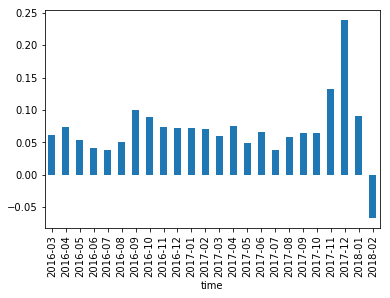

In [22]:
all_msg_clean['polarity'].groupby(all_msg_clean.time.dt.to_period('M')).mean().plot(kind='bar')

looks like I am on the whole more positive but that I had a real upswing in december but february isn't looking so good

## Subjectivity Sentiment

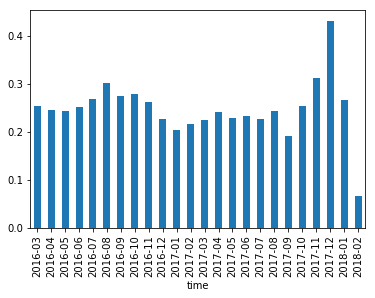

In [23]:
all_msg_clean['subjectivity'].groupby(all_msg_clean.time.dt.to_period('M')).mean().plot(kind='bar')

not sure what to make of this, looks like I have a pretty steady average of speaking from a subjective position (I feel, I think, etc.), I'd need to compare to other people to get a feel for what this means

## Using Spacy

In [26]:
text_models = [nlp(text) for text in all_msg_clean['text'] ]

In [75]:
# for model in text_models:    
#     for token in model:
#         print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
#               token.shape_, token.is_alpha, token.is_stop)

In [41]:
from spacy.symbols import nsubj, VERB
verbs = []
for model in text_models:
    for possible_verb in model:
        if possible_verb.pos == VERB:
            for possible_subject in possible_verb.children:
                if possible_subject.dep == nsubj:
                    verbs.append(possible_verb)
                    break
len(verbs)

33718

In [43]:
from spacy.symbols import NOUN
nouns = []
for model in text_models:
    for possible_noun in model:
        if possible_noun.pos == NOUN:
            nouns.append(possible_noun)
            break
len(nouns)

22935

In [45]:
from spacy.symbols import ADJ
adjectives = []
for model in text_models:
    for possible_adjective in model:
        if possible_adjective.pos == ADJ:
            adjectives.append(possible_adjective)
            break
len(adjectives)

16150

In [46]:
from spacy.symbols import ADV
adverbs = []
for model in text_models:
    for possible_adverb in model:
        if possible_adverb.pos == ADV:
            adverbs.append(possible_adverb)
            break
len(adverbs)

14820

In [47]:
from spacy.symbols import ADP
prepositions = []
for model in text_models:
    for possible_preposition in model:
        if possible_preposition.pos == ADP:
            prepositions.append(possible_preposition)
            break
len(prepositions)

14636

In [58]:
import random
random.sample(adjectives,1)[0].string + random.sample(nouns,1)[0].string

'permanent narratives '

In [59]:
random.sample(adjectives,1)[0].string + random.sample(nouns,1)[0].string + random.sample(verbs,1)[0].string + random.sample(nouns,1)[0].string

'harder worriesmet dude '

In [60]:
random.sample(adjectives,1)[0].string + random.sample(nouns,1)[0].string + random.sample(adjectives,1)[0].string + random.sample(verbs,1)[0].string + random.sample(nouns,1)[0].string

'my guy more spending alts '

In [61]:
random.sample(adjectives,1)[0].string + random.sample(nouns,1)[0].string + random.sample(verbs,1)[0].string + random.sample(nouns,1)[0].string

'your cab get noodles'

In [62]:
random.sample(adjectives,1)[0].string + random.sample(nouns,1)[0].string + random.sample(adjectives,1)[0].string + random.sample(verbs,1)[0].string + random.sample(nouns,1)[0].string

'only library great wondering conduit '

In [63]:
random.sample(adjectives,1)[0].string + random.sample(nouns,1)[0].string + random.sample(adjectives,1)[0].string + random.sample(verbs,1)[0].string + random.sample(nouns,1)[0].string

'weirdsoftball real means assumptions '

In [64]:
random.sample(adjectives,1)[0].string + random.sample(nouns,1)[0].string + random.sample(adjectives,1)[0].string + random.sample(verbs,1)[0].string + random.sample(nouns,1)[0].string

'smartstorm modern wish aaaaaah'

In [65]:
random.sample(adjectives,1)[0].string + random.sample(nouns,1)[0].string + random.sample(adjectives,1)[0].string + random.sample(verbs,1)[0].string + random.sample(nouns,1)[0].string

"whatever parents sad 'm pickles "

In [67]:
random.sample(adjectives,1)[0].string + random.sample(nouns,1)[0].string + random.sample(adjectives,1)[0].string + random.sample(verbs,1)[0].string + random.sample(nouns,1)[0].string

'fake dinner only was what '

In [70]:
random.sample(adjectives,1)[0].string + random.sample(nouns,1)[0].string + random.sample(adjectives,1)[0].string + random.sample(verbs,1)[0].string + random.sample(nouns,1)[0].string

'good food autocorrect is lethargy '

In [73]:
print(random.sample(adjectives,1)[0].string + random.sample(nouns,1)[0].string + random.sample(adjectives,1)[0].string + random.sample(verbs,1)[0].string + random.sample(nouns,1)[0].string + '\n' + 
random.sample(adjectives,1)[0].string + random.sample(nouns,1)[0].string + random.sample(adjectives,1)[0].string + random.sample(verbs,1)[0].string + random.sample(nouns,1)[0].string + '\n' + 
random.sample(adjectives,1)[0].string + random.sample(nouns,1)[0].string + random.sample(adjectives,1)[0].string + random.sample(verbs,1)[0].string + random.sample(nouns,1)[0].string + '\n' + 
random.sample(adjectives,1)[0].string + random.sample(nouns,1)[0].string + random.sample(adjectives,1)[0].string + random.sample(verbs,1)[0].string + random.sample(nouns,1)[0].string + '\n' + 
random.sample(adjectives,1)[0].string + random.sample(nouns,1)[0].string + random.sample(adjectives,1)[0].string + random.sample(verbs,1)[0].string + random.sample(nouns,1)[0].string + '\n' + 
random.sample(adjectives,1)[0].string + random.sample(nouns,1)[0].string + random.sample(adjectives,1)[0].string + random.sample(verbs,1)[0].string + random.sample(nouns,1)[0].string + '\n' + 
random.sample(adjectives,1)[0].string + random.sample(nouns,1)[0].string + random.sample(adjectives,1)[0].string + random.sample(verbs,1)[0].string + random.sample(nouns,1)[0].string + '\n' + 
random.sample(adjectives,1)[0].string + random.sample(nouns,1)[0].string + random.sample(adjectives,1)[0].string + random.sample(verbs,1)[0].string + random.sample(nouns,1)[0].string + '\n' + 
random.sample(adjectives,1)[0].string + random.sample(nouns,1)[0].string + random.sample(adjectives,1)[0].string + random.sample(verbs,1)[0].string + random.sample(nouns,1)[0].string + '\n' + 
random.sample(adjectives,1)[0].string + random.sample(nouns,1)[0].string + random.sample(adjectives,1)[0].string + random.sample(verbs,1)[0].string + random.sample(nouns,1)[0].string)


american chaos much think cheese
nooooomeditation about sounds babette
young whoopsbig see agony
readyreedieaaahliked bet 
my mussels trueis sims 
coldflight late staying friends 
hot someone addicted got flight 
anxiousbed sadthinking text 
deep ghostbustersparanoid 's personhood 
cool dude my 's deals


In [74]:
print(random.sample(adjectives,1)[0].string + random.sample(nouns,1)[0].string + random.sample(adjectives,1)[0].string + random.sample(verbs,1)[0].string + random.sample(nouns,1)[0].string + '\n' + 
random.sample(adjectives,1)[0].string + random.sample(nouns,1)[0].string + random.sample(adjectives,1)[0].string + random.sample(verbs,1)[0].string + random.sample(nouns,1)[0].string + '\n' + 
random.sample(adjectives,1)[0].string + random.sample(nouns,1)[0].string + random.sample(adjectives,1)[0].string + random.sample(verbs,1)[0].string + random.sample(nouns,1)[0].string + '\n' + 
random.sample(adjectives,1)[0].string + random.sample(nouns,1)[0].string + random.sample(adjectives,1)[0].string + random.sample(verbs,1)[0].string + random.sample(nouns,1)[0].string + '\n' + 
random.sample(adjectives,1)[0].string + random.sample(nouns,1)[0].string + random.sample(adjectives,1)[0].string + random.sample(verbs,1)[0].string + random.sample(nouns,1)[0].string + '\n' + 
random.sample(adjectives,1)[0].string + random.sample(nouns,1)[0].string + random.sample(adjectives,1)[0].string + random.sample(verbs,1)[0].string + random.sample(nouns,1)[0].string + '\n' + 
random.sample(adjectives,1)[0].string + random.sample(nouns,1)[0].string + random.sample(adjectives,1)[0].string + random.sample(verbs,1)[0].string + random.sample(nouns,1)[0].string + '\n' + 
random.sample(adjectives,1)[0].string + random.sample(nouns,1)[0].string + random.sample(adjectives,1)[0].string + random.sample(verbs,1)[0].string + random.sample(nouns,1)[0].string + '\n' + 
random.sample(adjectives,1)[0].string + random.sample(nouns,1)[0].string + random.sample(adjectives,1)[0].string + random.sample(verbs,1)[0].string + random.sample(nouns,1)[0].string + '\n' + 
random.sample(adjectives,1)[0].string + random.sample(nouns,1)[0].string + random.sample(adjectives,1)[0].string + random.sample(verbs,1)[0].string + random.sample(nouns,1)[0].string)


same pelemy has brie
my sense weird got zach
arvixethousands nervous been haircut 
your tonight white be lipstick
glad typing interesting have weeks 
my https://twitter.com/prozdkp/status/864602108083023872goodlooking time 
which shows most seem cardamom 
which self earlier vom rating 
funglass your want omg 
many dinner omggoing 🔜
